In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.dpi'] = 150  


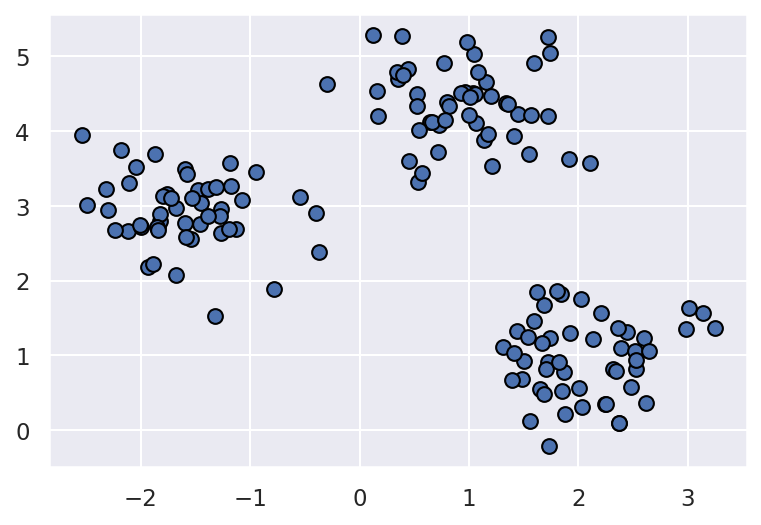

In [9]:
from sklearn.datasets import make_blobs
plt.rcParams['figure.dpi'] = 150 
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)


# plot
plt.scatter(
   X[:, 0], X[:, 1],
   edgecolor='black', s=50
)
plt.show()

In [10]:
from sklearn.cluster import KMeans
wss= []
index = []
for i in range(1,10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=10000, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X)
    wss.append(km.inertia_)
    index.append(i)
index, wss

([1, 2, 3, 4, 5, 6, 7, 8, 9],
 [713.6998289434159,
  283.46101780209307,
  72.47601670996698,
  62.84061768542222,
  55.239296155141936,
  47.115558368120126,
  40.47342797875884,
  36.00513150267187,
  31.89056249690212])

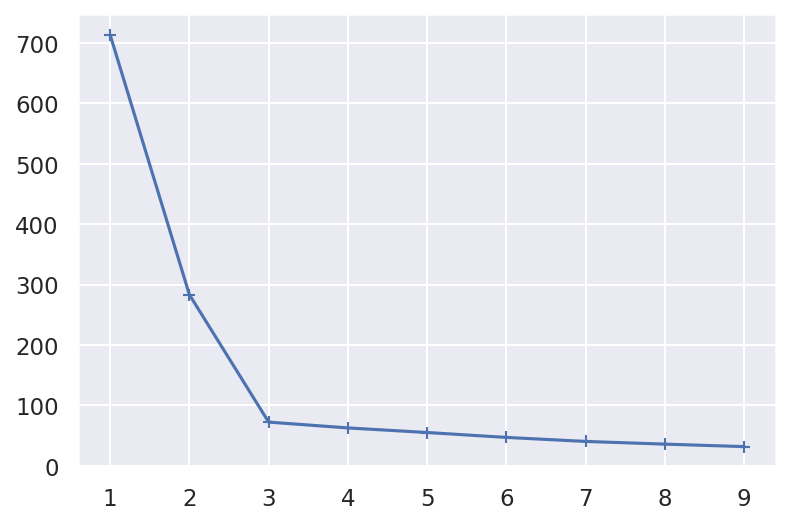

In [11]:
plt.plot(index,wss, marker= "+" )

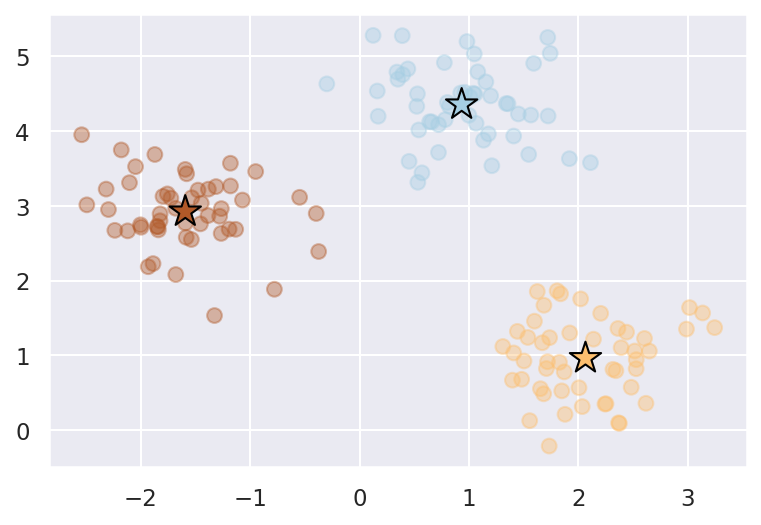

In [12]:
km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=10000, 
        tol=1e-04, random_state=0
    )
y_km = km.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap=plt.cm.Paired, alpha=0.4)
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], 
        s=250, marker='*', label='centroids',
        edgecolor='black',
       c=np.arange(0,3),cmap=plt.cm.Paired,)

In [19]:
from ipywidgets import *
def func(iteration_step,clusters):
    km = KMeans(
    n_clusters=clusters, init='random',
    n_init=1, max_iter=iteration_step, 
    tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap=plt.cm.Paired, alpha=0.4)
    plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], 
            s=250, marker='*', label='centroids',
            edgecolor='black',
           c=np.arange(0,clusters),cmap=plt.cm.Paired,)
    
    
interact(func,iteration_step=IntSlider(min=1, max=23, step=1,continuous_update=False),
        clusters=IntSlider(min=1, max=23, step=1,continuous_update=False)); 


interactive(children=(IntSlider(value=1, continuous_update=False, description='iteration_step', max=23, min=1)…